## Import standard scientific python libraries and pmagpy

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag
import pmagpy.pmagplotlib as pmag_plot
%matplotlib inline
%config InlineBackend.figure_formats = {'svg',}

## Generate and plot Fisher distributed unit vectors from a specified distribution

Let's use the function ipmag.fishrot to generate a set of 20 Fisher-distributed directions at a declination of 200° and inclination of 50°. These directions will serve as an example paleomagnetic dataset that will be used for the next several examples. The output from ipmag.fishrot is a nested list of lists of vectors [declination, inclination, intensity]. Often these vectors are unit vectors with an intensity of 1.0. Here the di_block output from that function is made into a pandas dataframe which allows for the direction to be nicely displayed and analyzed. In the code below, after the directions are generated using ipmag.fishrot, a dataframe is made from the fisher_directions di_block and then the first 5 rows are displayed with .head().

In [18]:
fisher_directions = ipmag.fishrot(k=40, n=20, dec=200, inc=50)
directions = pd.DataFrame(fisher_directions,columns=['dec','inc','length'])
directions.head()

,dec,inc,length
0,224.785194,56.193388,1.0
1,186.856370,46.419366,1.0
2,190.210783,53.287957,1.0
3,172.001909,54.504307,1.0
4,205.509160,42.241937,1.0


In [19]:
fisher_mean = ipmag.fisher_mean(directions.dec,directions.inc)

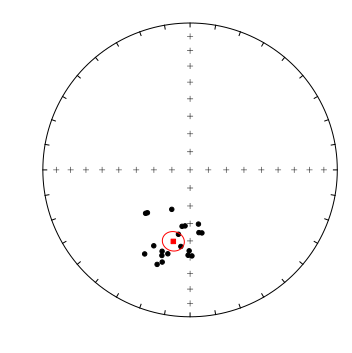

In [24]:
plt.figure(num=1,figsize=(5,5))
ipmag.plot_net(1)
ipmag.plot_di(dec=directions.dec,inc=directions.inc)
ipmag.plot_di_mean(fisher_mean['dec'],fisher_mean['inc'],fisher_mean['alpha95'],
                   marker='s',color='r')

## Flattening directional data

Inclination flattening can occur for magnetizations in sedimentary rocks. We can simulate inclination error of a specified "flattening factor" with the function ipmag.squish. Flattening factors range from 0 (completely flattened) to 1 (no flattening). Let's squish our directions with a 0.4 flattening factor.

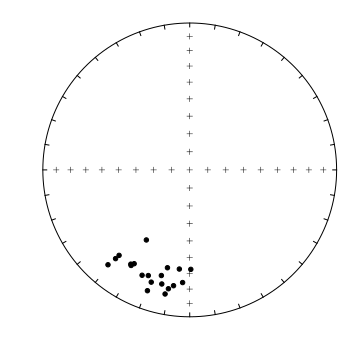

In [14]:
# squish all inclinations
squished_incs = []
for inclination in directions.inc:
    squished_incs.append(ipmag.squish(inclination, 0.4))

# plot the squished directional data
plt.figure(num=1,figsize=(5,5))
ipmag.plot_net(1)
ipmag.plot_di(directions.dec,squished_incs)
squished_DIs = np.array(zip(directions.dec,squished_incs))

## Calculate and display a Bingham distribution

Given that we took Fisher-distributed data and flattened it, the data no longer can be considered to be Fisher distributed. One way such elongate data are dealt with is by utilizing the Bingham distribution which can be circularly symmetric or elliptically shaped. The function **ipmag.bingham_mean** returns a dictionary with the parameters of the Bingham mean, while the program **ipmag.plot_di_mean_bingham** plots the mean and associated ellipse.

In [20]:
bingham_mean = ipmag.bingham_mean(directions.dec,squished_incs)
bingham_mean

{'Edec': 101.81172143831448,
 'Einc': 2.4007851798619524,
 'Eta': 7.9245148057707171,
 'Zdec': 186.73637315018769,
 'Zeta': 4.5835770277102172,
 'Zinc': -64.642546049390447,
 'dec': 192.94357973764156,
 'inc': 25.227318622432001,
 'n': 20}

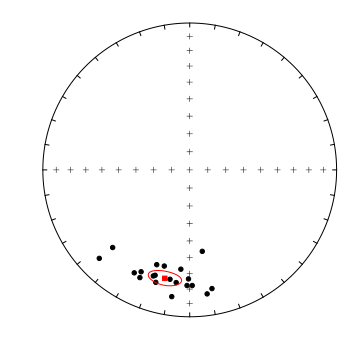

In [25]:
plt.figure(num=1,figsize=(5,5))
ipmag.plot_net(1)
ipmag.plot_di(directions.dec,squished_incs)
ipmag.plot_di_mean_bingham(bingham_mean,color='red',marker='s')